In [2]:
# import eland official API
# check it on https://github.com/elastic/eland
import eland as ed

# import elasticsearch-py client
from elasticsearch import Elasticsearch

# Function for pretty-printing JSON
def json(raw):
    import json
    print(json.dumps(raw, indent=2, sort_keys=True))
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [3]:
# Connect to an Elasticsearch instance
# here we use the official Elastic Python client
# check it on https://github.com/elastic/elasticsearch-py
es = Elasticsearch(
  ['http://localhost:9200'],
  http_auth=("es_kbn", "changeme")
)
# print the connection object info (same as visiting http://localhost:9200)
# make sure your elasticsearch node/cluster respond to requests
json(es.info())

{
  "cluster_name": "churn",
  "cluster_uuid": "K3nB4fp_QcyjpY-e2XVUbA",
  "name": "node-01",
  "tagline": "You Know, for Search",
  "version": {
    "build_date": "2020-07-22T19:31:37.655268Z",
    "build_flavor": "default",
    "build_hash": "bbbd2282a6668869c41efc5713ad8214d44c0ad1",
    "build_snapshot": true,
    "build_type": "zip",
    "lucene_version": "8.6.0",
    "minimum_index_compatibility_version": "7.0.0",
    "minimum_wire_compatibility_version": "7.10.0",
    "number": "8.0.0-SNAPSHOT"
  }
}


In [4]:
ed_invoices = ed.read_es(es, 'eland-invoices')

In [10]:
ed_invoices[['customer_id', 'invoice_id', 'invoice_date', 'item_name', 'order_qty', 'unit_price', 'revenue']].head()

,customer_id,invoice_id,invoice_date,item_name,order_qty,unit_price,revenue
173813,15615,549732,2019-04-11 16:47:00,Galaxy S10 Lite,12,16.5,198.0
173814,15615,549732,2019-04-11 16:47:00,RIVO JAGUAR J515,12,8.5,102.0
173815,15615,549732,2019-04-11 16:47:00,GALAXY A7 SM-A750F/DS,12,9.5,114.0
173816,15615,549732,2019-04-11 16:47:00,GALAXY A8 SM-A800F,12,16.5,198.0
173817,15615,549732,2019-04-11 16:47:00,RIVO CLASSIC C120,12,12.5,150.0


In [94]:
ed_invoices.info()

<class 'eland.dataframe.DataFrame'>
Index: 541909 entries, 446614 to 120088
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   country_location    541909 non-null  object        
 1   country_name        541909 non-null  object        
 2   customer_id         541909 non-null  object        
 3   customer_type       541909 non-null  object        
 4   first_invoice       541909 non-null  datetime64[ns]
 5   invoice_date        541909 non-null  datetime64[ns]
 6   invoice_date_day    541909 non-null  object        
 7   invoice_date_month  541909 non-null  object        
 8   invoice_date_year   541909 non-null  object        
 9   invoice_id          541909 non-null  object        
 10  item_brand          541909 non-null  object        
 11  item_id             541909 non-null  object        
 12  item_model          541909 non-null  object        
 13  item_name           541909 non-

In [6]:
# Pull a subset of your data for building graphs / operations locally.
#ed_invoices = ed_invoices[ed_invoices.invoice_id == "546888"].sample(100)
df_invoices = ed.eland_to_pandas(ed_invoices)

In [7]:
df_invoices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 446614 to 120088
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   country_location    541909 non-null  object             
 1   country_name        541909 non-null  object             
 2   customer_id         541909 non-null  int64              
 3   customer_type       541909 non-null  object             
 4   first_invoice       541909 non-null  datetime64[ns, UTC]
 5   invoice_date        541909 non-null  datetime64[ns]     
 6   invoice_date_day    541909 non-null  int64              
 7   invoice_date_month  541909 non-null  int64              
 8   invoice_date_year   541909 non-null  int64              
 9   invoice_id          541909 non-null  object             
 10  item_brand          541909 non-null  object             
 11  item_id             541909 non-null  int64              
 12  item_model      

In [143]:
df_invoices.head()

,level_0,index,country_location,country_name,customer_id,customer_type,first_invoice,invoice_date,invoice_date_day,invoice_date_month,invoice_date_year,invoice_id,item_brand,item_id,item_model,item_name,item_vendor,order_qty,revenue,unit_price,order_period,cohort_group
0,0,446614,"31.791702,-7.09262",Morocco,17730,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35200809,SM-N950F/DS,Samsung Galaxy Note 8,Samsung Korea,1,24.6,24.6,2019-03,2019-03
1,1,446615,"31.791702,-7.09262",Morocco,17730,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35352506,GT-E1282T,Samsung GT-E1282T,Samsung Korea,2,99.2,49.6,2019-03,2019-03
2,2,446616,"31.791702,-7.09262",Morocco,17730,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35272108,SM-J710FN/DS,Samsung SM-J710FN/DS,Samsung Korea,1,49.6,49.6,2019-03,2019-03
3,3,446617,"31.791702,-7.09262",Morocco,17730,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35270409,SM-J730F/DS,Galaxy J7 Pro SM-J730F/DS,Samsung Korea,2,99.2,49.6,2019-03,2019-03
4,4,446618,"31.791702,-7.09262",Morocco,17730,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Redmi,86654204,M1901F7G,Redmi Note7,Xiaomi Communications Co Ltd,1,57.9,57.9,2019-03,2019-03


In [188]:
#df_invoices = ed.eland_to_pandas(ed_invoices)
df_invoices.head()

,customer_id,index,country_location,country_name,customer_type,first_invoice,invoice_date,invoice_date_day,invoice_date_month,invoice_date_year,invoice_id,item_brand,item_id,item_model,item_name,item_vendor,order_qty,revenue,unit_price,order_period,cohort_group
0,17730,446614,"31.791702,-7.09262",Morocco,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35200809,SM-N950F/DS,Samsung Galaxy Note 8,Samsung Korea,1,24.6,24.6,2019-03,2019-01
1,17730,446615,"31.791702,-7.09262",Morocco,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35352506,GT-E1282T,Samsung GT-E1282T,Samsung Korea,2,99.2,49.6,2019-03,2019-01
2,17730,446616,"31.791702,-7.09262",Morocco,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35272108,SM-J710FN/DS,Samsung SM-J710FN/DS,Samsung Korea,1,49.6,49.6,2019-03,2019-01
3,17730,446617,"31.791702,-7.09262",Morocco,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35270409,SM-J730F/DS,Galaxy J7 Pro SM-J730F/DS,Samsung Korea,2,99.2,49.6,2019-03,2019-01
4,17730,446618,"31.791702,-7.09262",Morocco,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Redmi,86654204,M1901F7G,Redmi Note7,Xiaomi Communications Co Ltd,1,57.9,57.9,2019-03,2019-01


In [13]:
df_invoices['order_period'] = df_invoices.invoice_date.apply(lambda x: x.strftime('%Y-%m'))
df_invoices.head()

,country_location,country_name,customer_id,customer_type,first_invoice,invoice_date,invoice_date_day,invoice_date_month,invoice_date_year,invoice_id,item_brand,item_id,item_model,item_name,item_vendor,order_qty,revenue,unit_price,order_period
446614,"31.791702,-7.09262",Morocco,17730,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35200809,SM-N950F/DS,Samsung Galaxy Note 8,Samsung Korea,1,24.6,24.6,2019-03
446615,"31.791702,-7.09262",Morocco,17730,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35352506,GT-E1282T,Samsung GT-E1282T,Samsung Korea,2,99.2,49.6,2019-03
446616,"31.791702,-7.09262",Morocco,17730,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35272108,SM-J710FN/DS,Samsung SM-J710FN/DS,Samsung Korea,1,49.6,49.6,2019-03
446617,"31.791702,-7.09262",Morocco,17730,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35270409,SM-J730F/DS,Galaxy J7 Pro SM-J730F/DS,Samsung Korea,2,99.2,49.6,2019-03
446618,"31.791702,-7.09262",Morocco,17730,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Redmi,86654204,M1901F7G,Redmi Note7,Xiaomi Communications Co Ltd,1,57.9,57.9,2019-03


In [14]:
df_invoices[['customer_id', 'invoice_id', 'invoice_date', 'item_name', 'order_qty', 'unit_price', 'revenue', 'order_period']].head()

,customer_id,invoice_id,invoice_date,item_name,order_qty,unit_price,revenue,order_period
446614,17730,546888,2019-03-17 18:15:00,Samsung Galaxy Note 8,1,24.6,24.6,2019-03
446615,17730,546888,2019-03-17 18:15:00,Samsung GT-E1282T,2,49.6,99.2,2019-03
446616,17730,546888,2019-03-17 18:15:00,Samsung SM-J710FN/DS,1,49.6,49.6,2019-03
446617,17730,546888,2019-03-17 18:15:00,Galaxy J7 Pro SM-J730F/DS,2,49.6,99.2,2019-03
446618,17730,546888,2019-03-17 18:15:00,Redmi Note7,1,57.9,57.9,2019-03


In [15]:
df_invoices.set_index('customer_id', inplace=True)
df_invoices['cohort_group'] = df_invoices.groupby(level=0)['invoice_date'].min().apply(lambda x: x.strftime('%Y-%m'))
df_invoices.reset_index(inplace=True)
df_invoices.head()

,customer_id,country_location,country_name,customer_type,first_invoice,invoice_date,invoice_date_day,invoice_date_month,invoice_date_year,invoice_id,item_brand,item_id,item_model,item_name,item_vendor,order_qty,revenue,unit_price,order_period,cohort_group
0,17730,"31.791702,-7.09262",Morocco,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35200809,SM-N950F/DS,Samsung Galaxy Note 8,Samsung Korea,1,24.6,24.6,2019-03,2019-01
1,17730,"31.791702,-7.09262",Morocco,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35352506,GT-E1282T,Samsung GT-E1282T,Samsung Korea,2,99.2,49.6,2019-03,2019-01
2,17730,"31.791702,-7.09262",Morocco,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35272108,SM-J710FN/DS,Samsung SM-J710FN/DS,Samsung Korea,1,49.6,49.6,2019-03,2019-01
3,17730,"31.791702,-7.09262",Morocco,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Samsung,35270409,SM-J730F/DS,Galaxy J7 Pro SM-J730F/DS,Samsung Korea,2,99.2,49.6,2019-03,2019-01
4,17730,"31.791702,-7.09262",Morocco,Existing Customer,2019-01-17 14:49:00+00:00,2019-03-17 18:15:00,17,3,2019,546888,Redmi,86654204,M1901F7G,Redmi Note7,Xiaomi Communications Co Ltd,1,57.9,57.9,2019-03,2019-01


In [16]:
df_invoices[['customer_id', 'invoice_id', 'invoice_date', 'item_name', 'order_qty', 'unit_price', 'revenue', 'order_period', 'cohort_group']].head()

,customer_id,invoice_id,invoice_date,item_name,order_qty,unit_price,revenue,order_period,cohort_group
0,17730,546888,2019-03-17 18:15:00,Samsung Galaxy Note 8,1,24.6,24.6,2019-03,2019-01
1,17730,546888,2019-03-17 18:15:00,Samsung GT-E1282T,2,49.6,99.2,2019-03,2019-01
2,17730,546888,2019-03-17 18:15:00,Samsung SM-J710FN/DS,1,49.6,49.6,2019-03,2019-01
3,17730,546888,2019-03-17 18:15:00,Galaxy J7 Pro SM-J730F/DS,2,49.6,99.2,2019-03,2019-01
4,17730,546888,2019-03-17 18:15:00,Redmi Note7,1,57.9,57.9,2019-03,2019-01


In [121]:
type(df_invoices)

pandas.core.frame.DataFrame

In [17]:
grouped = df_invoices.groupby(['cohort_group', 'order_period'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'customer_id': pd.Series.nunique,
                       'invoice_id': pd.Series.nunique,
                       'revenue': np.sum})

In [18]:
cohorts.head()

customer_id  invoice_id    revenue
cohort_group order_period                                    
2018-12      2018-12              1115        2025  7491306.2
             2019-01               412         916  3724385.3
             2019-02               346         741  2926223.1
             2019-03               406         988  3773491.4
             2019-04               381         760  2314588.2

In [19]:
# make the column names more meaningful
cohorts.rename(columns={'customer_id': 'total_customers',
                        'invoice_id': 'total_orders'}, inplace=True)

In [20]:
cohorts.head()

total_customers  total_orders    revenue
cohort_group order_period                                          
2018-12      2018-12                  1115          2025  7491306.2
             2019-01                   412           916  3724385.3
             2019-02                   346           741  2926223.1
             2019-03                   406           988  3773491.4
             2019-04                   381           760  2314588.2

In [21]:
def cohort_period(df_invoices):
    """
    Creates a `cohort_period` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['customer_id', 'invoice_date', inplace=True)
        df = df.groupby('customer_id').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df_invoices['cohort_range'] = np.arange(len(df_invoices)) + 1
    return df_invoices

cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [22]:
cohorts.head()

total_customers  total_orders    revenue  \
cohort_group order_period                                             
2018-12      2018-12                  1115          2025  7491306.2   
             2019-01                   412           916  3724385.3   
             2019-02                   346           741  2926223.1   
             2019-03                   406           988  3773491.4   
             2019-04                   381           760  2314588.2   

                           cohort_range  
cohort_group order_period                
2018-12      2018-12                  1  
             2019-01                  2  
             2019-02                  3  
             2019-03                  4  
             2019-04                  5

In [23]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_range'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['total_customers'].groupby(level=0).first()
cohort_group_size.head(15)

cohort_group
2018-12    1115
2019-01     475
2019-02     378
2019-03     445
2019-04     289
2019-05     290
2019-06     227
2019-07     200
2019-08     162
2019-09     263
2019-10     281
2019-11     218
2019-12      29
Name: total_customers, dtype: int64

In [24]:
cohorts['total_customers'].head(15)

cohort_group  cohort_range
2018-12       1               1115
              2                412
              3                346
              4                406
              5                381
              6                429
              7                398
              8                400
              9                376
              10               438
              11               415
              12               561
              13               288
2019-01       1                475
              2                107
Name: total_customers, dtype: int64

In [25]:
cohorts['total_customers'].unstack(0).head(10)

cohort_group,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
cohort_range,,,,,,,,,,,,,
1,1115.0,475.0,378.0,445.0,289.0,290.0,227.0,200.0,162.0,263.0,281.0,218.0,29.0
2,412.0,107.0,98.0,90.0,69.0,72.0,54.0,46.0,48.0,88.0,97.0,40.0,NaN
3,346.0,133.0,71.0,116.0,66.0,53.0,39.0,40.0,44.0,108.0,44.0,NaN,NaN
4,406.0,113.0,107.0,104.0,68.0,50.0,69.0,55.0,53.0,36.0,NaN,NaN,NaN
5,381.0,143.0,107.0,113.0,65.0,70.0,62.0,70.0,29.0,NaN,NaN,NaN,NaN
6,429.0,141.0,103.0,91.0,76.0,83.0,91.0,30.0,NaN,NaN,NaN,NaN,NaN
7,398.0,126.0,104.0,122.0,70.0,98.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
8,400.0,121.0,107.0,125.0,91.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,376.0,143.0,107.0,154.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
user_retention = cohorts['total_customers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(15)

cohort_group,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
cohort_range,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.369507,0.225263,0.259259,0.202247,0.238754,0.248276,0.237885,0.230,0.296296,0.334601,0.345196,0.183486,NaN
3,0.310314,0.280000,0.187831,0.260674,0.228374,0.182759,0.171806,0.200,0.271605,0.410646,0.156584,NaN,NaN
4,0.364126,0.237895,0.283069,0.233708,0.235294,0.172414,0.303965,0.275,0.327160,0.136882,NaN,NaN,NaN
5,0.341704,0.301053,0.283069,0.253933,0.224913,0.241379,0.273128,0.350,0.179012,NaN,NaN,NaN,NaN
6,0.384753,0.296842,0.272487,0.204494,0.262976,0.286207,0.400881,0.150,NaN,NaN,NaN,NaN,NaN
7,0.356951,0.265263,0.275132,0.274157,0.242215,0.337931,0.123348,NaN,NaN,NaN,NaN,NaN,NaN
8,0.358744,0.254737,0.283069,0.280899,0.314879,0.158621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.337220,0.301053,0.283069,0.346067,0.110727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


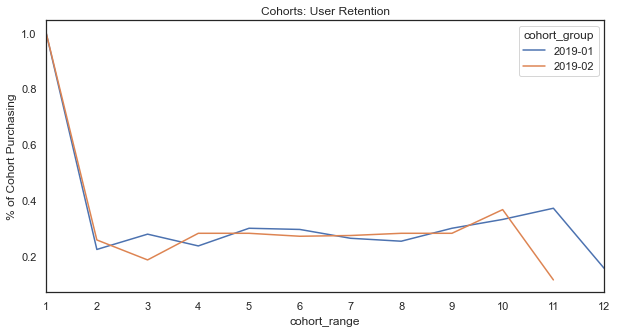

In [205]:
user_retention[['2019-01', '2019-02']].plot(figsize=(10,5))

plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

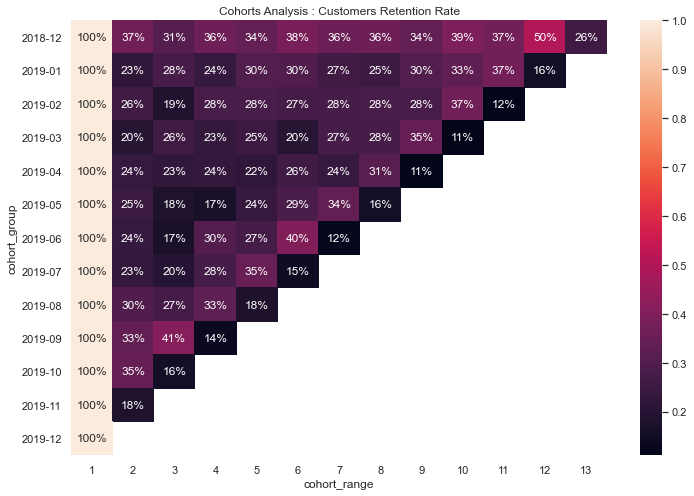

In [219]:
# Creating heatmaps in matplotlib is more difficult than it should be.
# Thankfully, Seaborn makes them easy for us.
# http://stanford.edu/~mwaskom/software/seaborn/

import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts Analysis : Customers Retention Rate')

sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');